In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
#importing data
file_path=r"C:\Users\DELL\Downloads\Housing.csv"
data=pd.read_csv(file_path)

In [113]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [114]:
data.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [115]:
#cleaning data 
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [117]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [118]:
#finding unique values in categorical columns 
#first one is mainroad
unique_val = data['mainroad'].unique()

In [119]:
unique_val

array(['yes', 'no'], dtype=object)

In [120]:
unique_val = data['guestroom'].unique()
unique_val

array(['no', 'yes'], dtype=object)

In [121]:
#finding unique values in numerical values 
unique_val = data['bedrooms'].unique()
unique_val

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [122]:
unique_val = data['bathrooms'].unique()
unique_val

array([2, 4, 1, 3], dtype=int64)

In [123]:
unique_val = data['stories'].unique()
unique_val

array([3, 4, 2, 1], dtype=int64)

In [124]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [125]:
data.duplicated().sum()

0

In [126]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = data[(data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR))]

In [127]:
def detect_iqr_outliers(data, columns):
    outliers = pd.DataFrame()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        column_outliers =data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
        outliers = pd.concat([outliers, column_outliers]).drop_duplicates()
    return outliers

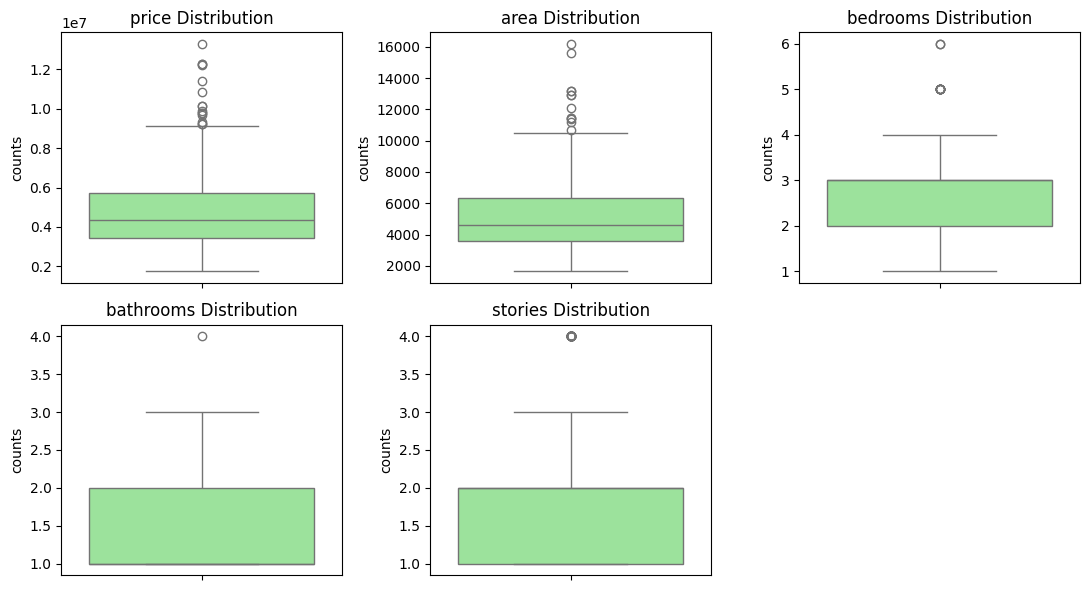

In [128]:
plt.figure(figsize=(11,6))
col = ['price','area','bedrooms','bathrooms','stories']

for i,column in enumerate(col):
    plt.subplot(2,3,i+1)
    sns.boxplot(data[column] , color='lightgreen')
    plt.title(f'{column} Distribution')
    plt.ylabel('counts')
    #plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

In [129]:
data.shape

(545, 13)

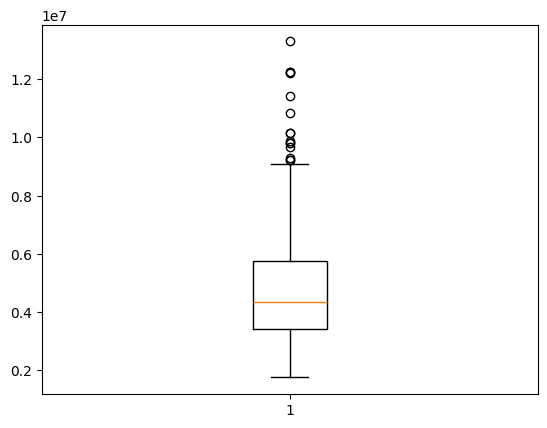

In [130]:
plt.boxplot(data.price)
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

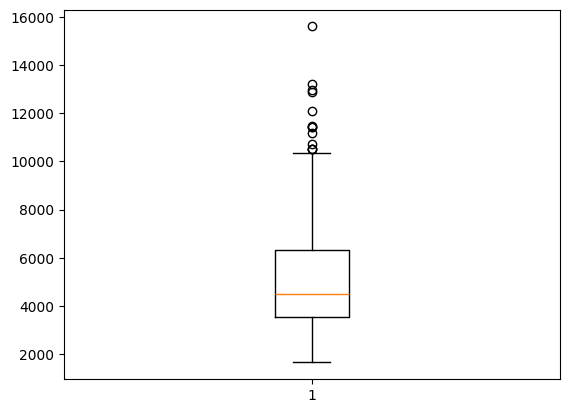

In [131]:
plt.boxplot(data.area)
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

In [132]:
#Exploratory data analysis 

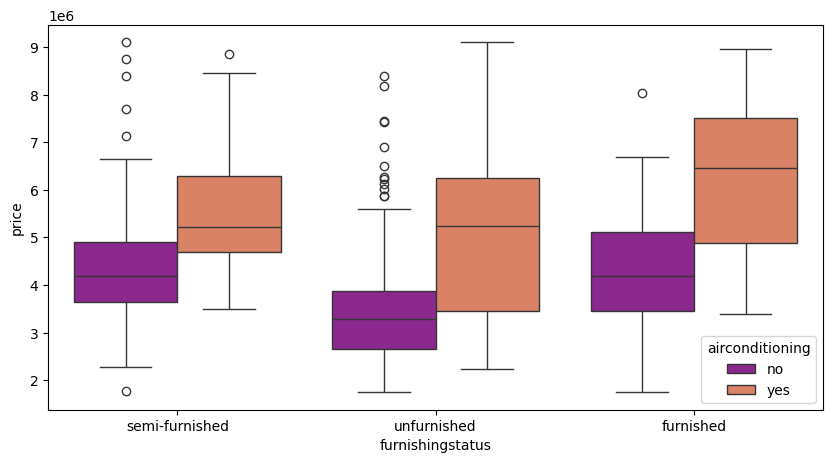

In [133]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = data , palette='plasma')
plt.show()

In [134]:
data.shape

(517, 13)

In [135]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [136]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [137]:
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished


In [ ]:
#Splitting data into training and testing sets 

In [138]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()

In [143]:
num = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
X_train[num] = scaler.fit_transform(X_train[num])

In [144]:
X_train.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,semi-furnished
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,furnished


In [151]:
X_train.drop('furnishingstatus', axis=1, inplace=True)

In [152]:
X_train.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0


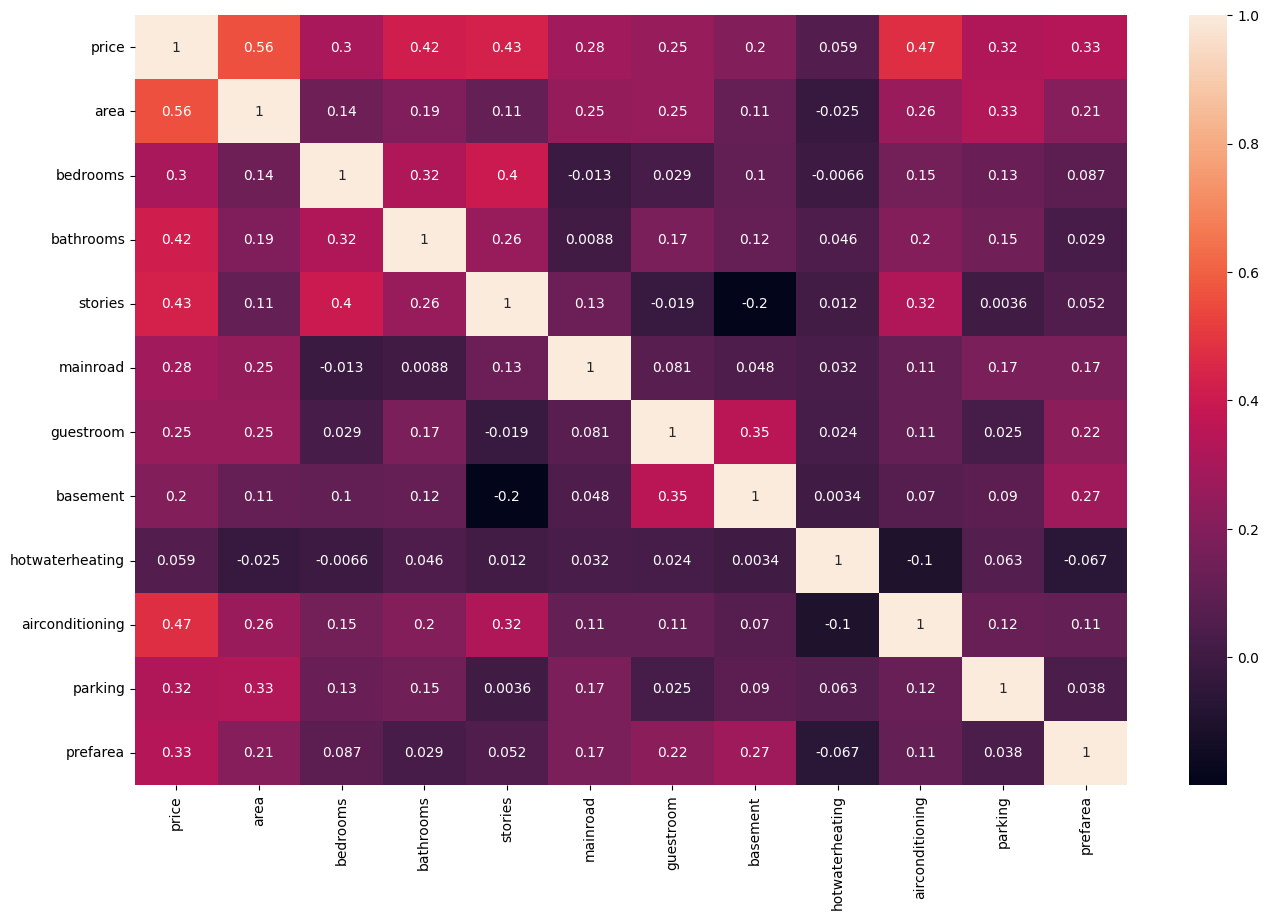

In [155]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr() , annot = True)
plt.show()

In [ ]:
#dividing into X and Y for the model building

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [168]:
X = data.drop(columns=['price'])
y = data['price']

In [173]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             517 non-null    int64
 1   bedrooms         517 non-null    int64
 2   bathrooms        517 non-null    int64
 3   stories          517 non-null    int64
 4   mainroad         517 non-null    int64
 5   guestroom        517 non-null    int64
 6   basement         517 non-null    int64
 7   hotwaterheating  517 non-null    int64
 8   airconditioning  517 non-null    int64
 9   parking          517 non-null    int64
 10  prefarea         517 non-null    int64
dtypes: int64(11)
memory usage: 64.6 KB


In [174]:
y

15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 517, dtype: int64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
model = LinearRegression()

In [188]:
model.fit(X_train, y_train)

LinearRegression()

In [193]:
# Predict on the test set
y_pred = model.predict(X_test)

In [194]:
from sklearn.metrics import mean_squared_error, r2_score

In [195]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1031069174338.3417


In [196]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 1015415.7642750784


In [197]:
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

R-squared Score: 0.6485573332696895


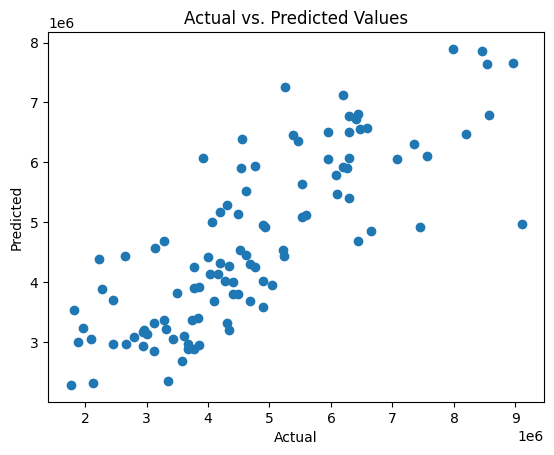

In [198]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

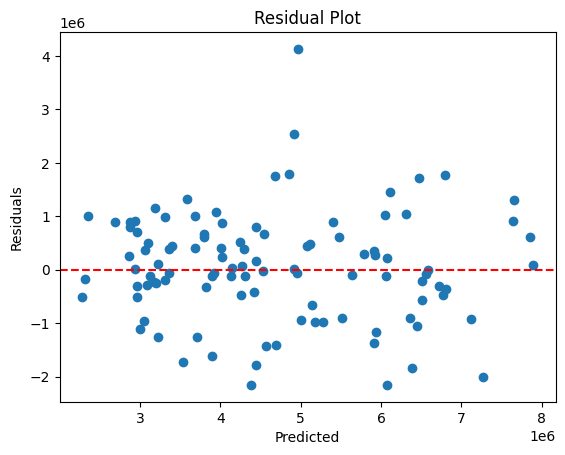

In [199]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.show()